In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install emoji
%pip install nltk
%pip install wordcloud
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
#from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline
#from transformers import MarianMTModel, MarianTokenizer
#from transformers import pipeline

import pickle

In [4]:
%pip install googletrans==4.0.0-rc1


In [5]:
from googletrans import Translator

In [6]:
df=pd.read_csv('F:\DMT\hate_speech_mlma\hate_speech_mlma\dataset(french).csv')

In [7]:
df.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,rt @user personnage ainsi q tte la clique gauc...,abusive,direct,shock,origin,other
1,2,@user @user @user bah oui t'as raison l'autre ...,offensive,indirect,shock,other,individual
2,3,moi j'ai personne à qui m'adresser pour réclam...,hateful,direct,anger_confusion_sadness_fear_disgust,other,women
3,4,@user @user c...est vrai que les anchois sont ...,normal,indirect,indifference,other,other
4,5,eh les renois faut se réveiller la @url,normal,direct,sadness,origin,african_descent


In [8]:
df.tail()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
4009,4010,@user tres bien. le cinema francais c...est so...,offensive,indirect,sadness,other,left_wing_people
4010,4011,@user j’ai que des rebeus en demande d’amis aussi,disrespectful_normal,direct,indifference,origin,arabs
4011,4012,@user sale juif de merde,offensive,direct,fear_shock_indifference_sadness_disgust,religion,jews
4012,4013,@user pourquoi tant de migrants africains en e...,normal,indirect,indifference,origin,immigrants
4013,4014,@user mdr c’est un mongol lui en mode lui dema...,offensive,indirect,indifference,disability,individual


In [9]:
#checking missing values
df.isnull().sum() #no missing values

HITId                  0
tweet                  0
sentiment              0
directness             0
annotator_sentiment    0
target                 0
group                  0
dtype: int64

In [10]:
df.drop('HITId', axis='columns', inplace= True)
df.drop('sentiment',axis='columns',  inplace= True)
df.drop('directness', axis='columns', inplace= True)
df.drop('annotator_sentiment', axis='columns', inplace= True)
df.drop('group', axis='columns', inplace= True)

In [11]:
df.head()

,tweet,target
0,rt @user personnage ainsi q tte la clique gauc...,origin
1,@user @user @user bah oui t'as raison l'autre ...,other
2,moi j'ai personne à qui m'adresser pour réclam...,other
3,@user @user c...est vrai que les anchois sont ...,other
4,eh les renois faut se réveiller la @url,origin


In [12]:
df['target'].value_counts()

origin                2266
other                 1386
disability             177
religion               146
gender                  27
sexual_orientation      12
Name: target, dtype: int64

In [13]:
#renaming
#cleaning and data processing

In [14]:
df=df.rename(columns={
    'tweet':'text',
})

In [15]:
df.head()

,text,target
0,rt @user personnage ainsi q tte la clique gauc...,origin
1,@user @user @user bah oui t'as raison l'autre ...,other
2,moi j'ai personne à qui m'adresser pour réclam...,other
3,@user @user c...est vrai que les anchois sont ...,other
4,eh les renois faut se réveiller la @url,origin


In [16]:
# Function to translate text using Google Translate API
def translate_text(text):
    target_language='en'
    import httpx
    timeout = httpx.Timeout(256)
    translator = Translator(timeout=timeout)
    translated_text = translator.translate(text, dest=target_language)
    print (translated_text.text)
    return translated_text.text



In [17]:
df.head()

,text,target
0,rt @user personnage ainsi q tte la clique gauc...,origin
1,@user @user @user bah oui t'as raison l'autre ...,other
2,moi j'ai personne à qui m'adresser pour réclam...,other
3,@user @user c...est vrai que les anchois sont ...,other
4,eh les renois faut se réveiller la @url,origin


In [18]:
# Translate text to English (you can choose a different target language)
df['translated_text'] = df['text'].apply(translate_text)

RT @user character as well as the whole leftist click of 1 macronists !! have all required quality who were instilled
@User @User @USER @USER BAH Yes you are right the other is a Mongolian.
I have no one to contact to claim.The neighbor is a stingy and noisy retarded in the administrats ... @URL
@user @user C ... is true that the anchovies are going to the moon and invents million technology!
Hey the Renois must wake up the @URL
@user @user in Algeria Migrants are expelled in the desert I think they have another vision ... @URL
@user SJW and feminist twitter a dirty combo
@user @User you also know why is above?because if you want tomorrow, there is more ani ... @URL
@user @user mytho you just wanted to make you ken by the renois of your high school they did not want to… @URL
He's a retarded giga lol
#Duisburg 4 Arab refugees wet stabbing a 5 -month pregnant German teenager who believes she p ... @URL
@use what you're talking about I say your not ashamed to say half black place of half 

In [19]:
df

,text,target,translated_text
0,rt @user personnage ainsi q tte la clique gauc...,origin,RT @user character as well as the whole leftis...
1,@user @user @user bah oui t'as raison l'autre ...,other,@User @User @USER @USER BAH Yes you are right ...
2,moi j'ai personne à qui m'adresser pour réclam...,other,I have no one to contact to claim.The neighbor...
3,@user @user c...est vrai que les anchois sont ...,other,@user @user C ... is true that the anchovies a...
4,eh les renois faut se réveiller la @url,origin,Hey the Renois must wake up the @URL
...,...,...,...
4009,@user tres bien. le cinema francais c...est so...,other,@user very well.The French Cinema C ... is oft...
4010,@user j’ai que des rebeus en demande d’amis aussi,origin,@user I have only rebeus asking for friends too
4011,@user sale juif de merde,religion,@user dirty shitty Jew
4012,@user pourquoi tant de migrants africains en e...,origin,@use why so many African migrants in Europe so...


In [20]:
df['target_encoded']=df['target'].replace({
    'origin':0,
    'gender':1,
    'religion':2,
    'other':3,
    'disability':4,
    'sexual_orientation':5,
})

In [21]:
df.head()

,text,target,translated_text,target_encoded
0,rt @user personnage ainsi q tte la clique gauc...,origin,RT @user character as well as the whole leftis...,0
1,@user @user @user bah oui t'as raison l'autre ...,other,@User @User @USER @USER BAH Yes you are right ...,3
2,moi j'ai personne à qui m'adresser pour réclam...,other,I have no one to contact to claim.The neighbor...,3
3,@user @user c...est vrai que les anchois sont ...,other,@user @user C ... is true that the anchovies a...,3
4,eh les renois faut se réveiller la @url,origin,Hey the Renois must wake up the @URL,0


In [91]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [92]:
stop_words = set(stopwords.words('english'))

In [93]:
#preprocessing of text

In [94]:
# function to remove emojis

def strip_emoji(translated_text):
    return emoji.replace_emoji(translated_text,replace="")

In [95]:
# function to convert text to lowercase, remove (unwanted characters, urls, numbers, stopwords)

def strip_all_entities(translated_text):

    translated_text= translated_text.replace('\r', '').replace('\n','').lower()
    translated_text= re.sub(r"(?:\@|https?|-\://)\S+",'',translated_text)
    translated_text= re.sub(r"[^\x00-\x7f]",r'',translated_text)
    translated_text= re.sub('[0-9]+','',translated_text)

    stopchars =string.punctuation
    table=str.maketrans('','',stopchars)
    translated_text = translated_text.translate(table)

    translated_text=[word for word in translated_text.split() if word not in stop_words]
    translated_text =' '.join(translated_text)

    return translated_text

In [96]:
#function to remove contractions

def decontract(translated_text):

    translated_text=re.sub(r"cant\'t'" ,"can not", translated_text)
    translated_text = re.sub(r"n\'t", " not", translated_text)
    translated_text = re.sub(r"\'re", " are", translated_text)
    translated_text = re.sub(r"\'s", " is", translated_text)
    translated_text = re.sub(r"\'d", " would", translated_text)
    translated_text = re.sub(r"\'ll", " will", translated_text)
    translated_text = re.sub(r"\'t", " not", translated_text)
    translated_text = re.sub(r"\'ve", " have", translated_text)
    translated_text = re.sub(r"\'m", " am", translated_text)

    return translated_text

In [97]:
# funtion to clean hashtags

def clean_hashtags(tweet):
    new_tweet =" ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))

    return new_tweet2

In [98]:
# function to filter special characters

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [100]:
# removing sequences and applying stemming

def remove_mult_spaces(translated_text):
    return re.sub("\s\s+" , " ",translated_text)

def stemmer(translated_text):
    tokenized = nltk.word_tokenize(translated_text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

def lemmatize(translated_text):
    tokenized = nltk.word_tokenize(translated_text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [101]:
# using all functions

def preprocess(translated_text):
    translated_text = strip_emoji(translated_text)
    translated_text = strip_all_entities(translated_text)
    translated_text = decontract(translated_text)
    translated_text = clean_hashtags(translated_text)
    translated_text = filter_chars(translated_text)
    translated_text = remove_mult_spaces(translated_text)
    translated_text = stemmer(translated_text)
    translated_text = lemmatize(translated_text)

    return translated_text

In [103]:
df['cleaned_text'] = df['translated_text'].apply(preprocess)
df.head()

TypeError: 'DecisionTreeClassifier' object is not subscriptable

In [33]:
# dealing with duplicates

df['cleaned_text'].duplicated().sum()

98

In [34]:
df.drop_duplicates('cleaned_text' ,inplace=True)

In [35]:
#tokenization

df['tweet_list']=df['cleaned_text'].apply(word_tokenize)

df.head()

,text,target,translated_text,target_encoded,cleaned_text,tweet_list
0,rt @user personnage ainsi q tte la clique gauc...,origin,RT @user character as well as the whole leftis...,0,rt charact well whole leftist click macronist ...,"[rt, charact, well, whole, leftist, click, mac..."
1,@user @user @user bah oui t'as raison l'autre ...,other,@User @User @USER @USER BAH Yes you are right ...,3,bah ye right mongolian,"[bah, ye, right, mongolian]"
2,moi j'ai personne à qui m'adresser pour réclam...,other,I have no one to contact to claim.The neighbor...,3,one contact claimth neighbor stingi noisi reta...,"[one, contact, claimth, neighbor, stingi, nois..."
3,@user @user c...est vrai que les anchois sont ...,other,@user @user C ... is true that the anchovies a...,3,c true anchovi go moon invent million technolog,"[c, true, anchovi, go, moon, invent, million, ..."
4,eh les renois faut se réveiller la @url,origin,Hey the Renois must wake up the @URL,0,hey renoi must wake,"[hey, renoi, must, wake]"


In [36]:
#EDA
#checking length of various tweet text

text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)

df['text_len'] = text_len

In [37]:
# removing text without words

df = df[df['text_len']!=0]

In [38]:
df.shape

(3915, 7)

In [39]:
# function to create a word cloud

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()

    wordcloud = WordCloud(background_color = 'white',max_words=2000, max_font_size=256,random_state=42).generate(string)


#plot the wordcloud image

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [40]:
#splitting data based on target for EDA

other_type = df[df['target']=='other']
origin_type = df[df['target']=='origin']
gender_type = df[df['target']=='gender']
religion_type = df[df['target']=='religion']
disability_type = df[df['target']=='disability']
sexual_orientation_type = df[df['target']=='sexual_orientation']

In [41]:
other = Counter([item for sublist in other_type['tweet_list'] for item in sublist])
top25_other = pd.DataFrame(other.most_common(25))
top25_other.columns = ['Top Words','Count']
top25_other.head(25)

,Top Words,Count
0,leftist,237
1,retard,157
2,mongol,103
3,mongoli,100
4,like,76
5,violenc,70
6,say,66
7,linger,61
8,c,54
9,big,52


Text(0.5, 1.0, 'Top 25 words in Other Cyberbullying in French')

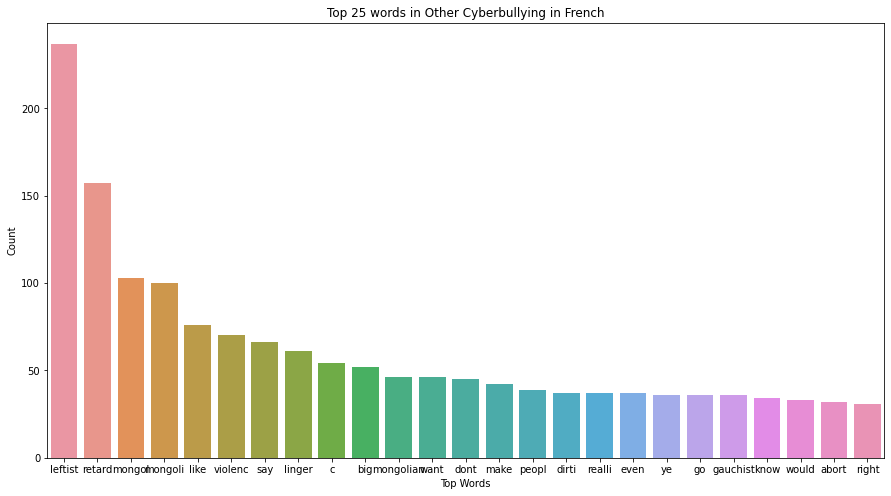

In [42]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_other, y="Count", x="Top Words")
plt.title("Top 25 words in Other Cyberbullying in French")

In [43]:
origin = Counter([item for sublist in origin_type['tweet_list'] for item in sublist])
top25_origin = pd.DataFrame(origin.most_common(25))
top25_origin.columns = ['Top Words','Count']
top25_origin.style.background_gradient(cmap='Greens')

,Top Words,Count
0,renoi,363
1,arab,301
2,rebeu,286
3,dirti,205
4,leftist,182
5,migrant,161
6,like,146
7,retard,124
8,say,123
9,mongoli,116


Text(0.5, 1.0, 'Top 25 words in Origin Cyberbullying in French')

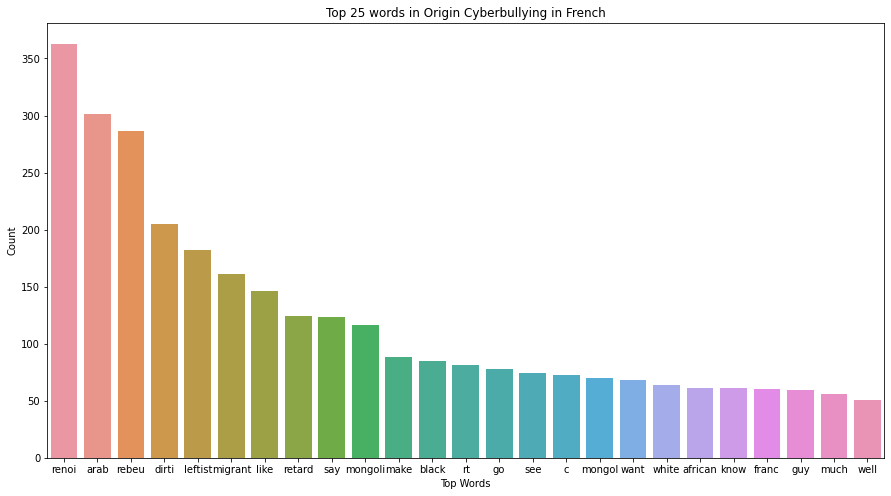

In [44]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_origin, y="Count", x="Top Words")
plt.title("Top 25 words in Origin Cyberbullying in French")

In [45]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top25_gender = pd.DataFrame(gender.most_common(25))
top25_gender.columns = ['Top Words','Count']
top25_gender.style.background_gradient(cmap='Greens')

,Top Words,Count
0,feminist,14
1,dirti,8
2,abort,5
3,whore,5
4,woman,4
5,men,3
6,year,3
7,girl,3
8,dont,3
9,even,3


Text(0.5, 1.0, 'Top 25 words in Gender Cyberbullying in French')

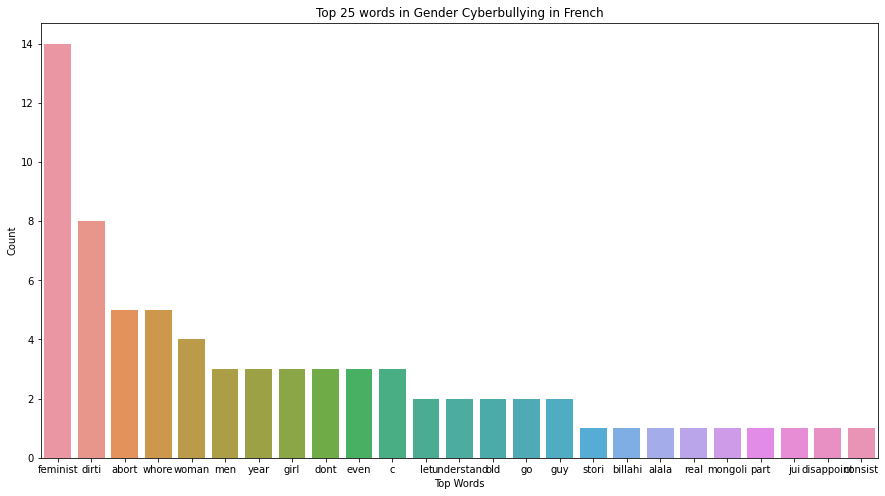

In [46]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_gender, y="Count", x="Top Words")
plt.title("Top 25 words in Gender Cyberbullying in French")

In [47]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top25_religion = pd.DataFrame(religion.most_common(25))
top25_religion.columns = ['Top Words','Count']
top25_religion.style.background_gradient(cmap='Greens')


,Top Words,Count
0,islam,62
1,terror,38
2,dirti,28
3,jew,23
4,muslim,15
5,jewish,14
6,anti,12
7,franc,9
8,ye,7
9,arab,6


Text(0.5, 1.0, 'Top 25 words in Religion Cyberbullying in French')

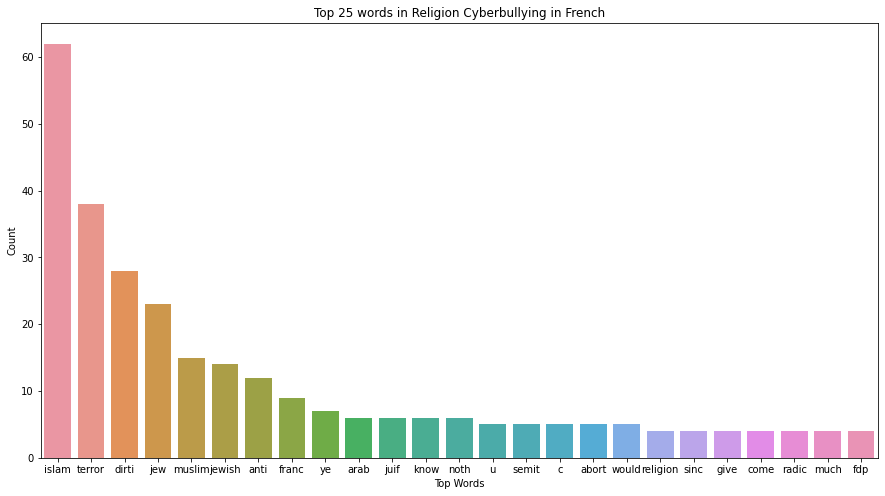

In [48]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_religion, y="Count", x="Top Words")
plt.title("Top 25 words in Religion Cyberbullying in French")

In [49]:
disability = Counter([item for sublist in disability_type['tweet_list'] for item in sublist])
top25_disability = pd.DataFrame(disability.most_common(25))
top25_disability.columns = ['Top Words','Count']
top25_disability.style.background_gradient(cmap='Greens')


,Top Words,Count
0,retard,48
1,mongol,41
2,mongoli,36
3,mongolian,16
4,like,12
5,say,8
6,mental,8
7,know,7
8,realli,7
9,fuck,6


Text(0.5, 1.0, 'Top 25 words in Disability Cyberbullying in French')

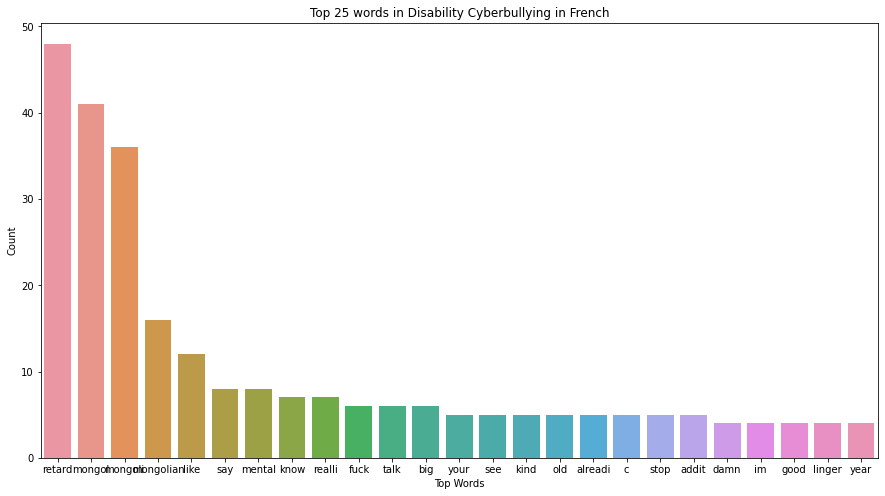

In [50]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_disability, y="Count", x="Top Words")
plt.title("Top 25 words in Disability Cyberbullying in French")

In [51]:
sexual_orientation = Counter([item for sublist in sexual_orientation_type['tweet_list'] for item in sublist])
top25_sexual_orientation = pd.DataFrame(sexual_orientation.most_common(25))
top25_sexual_orientation.columns = ['Top Words','Count']
top25_sexual_orientation.style.background_gradient(cmap='Greens')


,Top Words,Count
0,gay,4
1,homosexu,2
2,semi,2
3,dirti,2
4,pd,2
5,realli,2
6,shit,2
7,intellectu,1
8,terror,1
9,lobbi,1


Text(0.5, 1.0, 'Top 25 words in Disability Cyberbullying in French')

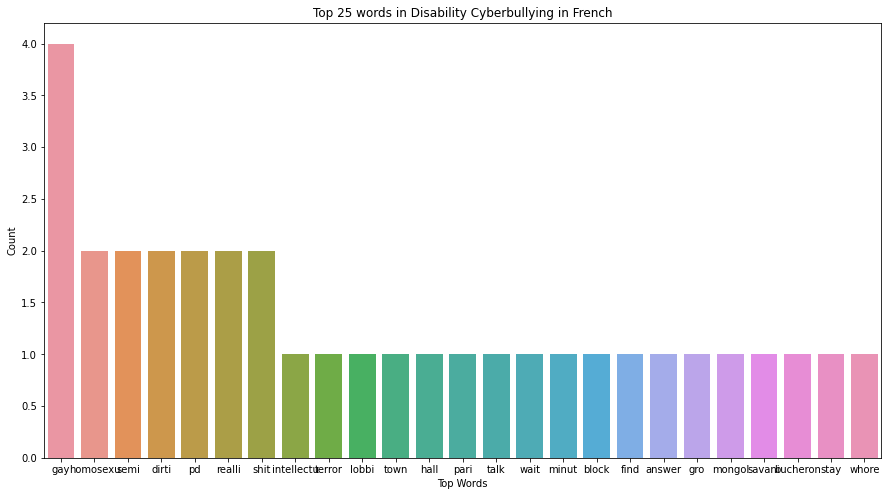

In [52]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_sexual_orientation, y="Count", x="Top Words")
plt.title("Top 25 words in Disability Cyberbullying in French")

In [53]:
df.head()

,text,target,translated_text,target_encoded,cleaned_text,tweet_list,text_len
0,rt @user personnage ainsi q tte la clique gauc...,origin,RT @user character as well as the whole leftis...,0,rt charact well whole leftist click macronist ...,"[rt, charact, well, whole, leftist, click, mac...",10
1,@user @user @user bah oui t'as raison l'autre ...,other,@User @User @USER @USER BAH Yes you are right ...,3,bah ye right mongolian,"[bah, ye, right, mongolian]",4
2,moi j'ai personne à qui m'adresser pour réclam...,other,I have no one to contact to claim.The neighbor...,3,one contact claimth neighbor stingi noisi reta...,"[one, contact, claimth, neighbor, stingi, nois...",8
3,@user @user c...est vrai que les anchois sont ...,other,@user @user C ... is true that the anchovies a...,3,c true anchovi go moon invent million technolog,"[c, true, anchovi, go, moon, invent, million, ...",8
4,eh les renois faut se réveiller la @url,origin,Hey the Renois must wake up the @URL,0,hey renoi must wake,"[hey, renoi, must, wake]",4


In [54]:
# Modelling

In [55]:
# Splitting data into test and train

In [56]:
X,Y = df['cleaned_text'],df['target_encoded']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3132,) (3132,) (783,) (783,)


In [58]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

In [59]:
Counter(y_train)

Counter({3: 1075, 0: 1779, 2: 112, 4: 134, 5: 10, 1: 22})

In [60]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(3132, 5434)
(783, 5434)


In [61]:
ROS = RandomOverSampler(random_state=777)

In [62]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [63]:
Counter(y_train_ros)

Counter({3: 1779, 0: 1779, 2: 1779, 4: 1779, 5: 1779, 1: 1779})

In [64]:
# trying differnt models

In [65]:
# @title XGBoost

In [66]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
import xgboost as xgb

In [68]:
xg= xgb.XGBClassifier(n_estimators=100)

In [69]:
xg.fit(X_train_ros,y_train_ros)

[02:23:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [70]:
pred=xg.predict(X_test_tf)

In [71]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.611749680715198
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       445
           1       0.33      0.40      0.36         5
           2       0.38      0.79      0.51        28
           3       0.56      0.62      0.59       269
           4       0.15      0.41      0.22        34
           5       0.33      0.50      0.40         2

    accuracy                           0.61       783
   macro avg       0.43      0.56      0.47       783
weighted avg       0.69      0.61      0.64       783



In [72]:
# @title Gradient Boost

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators= 50)

model.fit(X_train_ros,y_train_ros.values.ravel())

acc_score = model.score(X_test_tf, y_test)
print("model score: %.3f" % acc_score)

y_pred=model.predict(X_test_tf)
print(classification_report(y_test,y_pred))

model score: 0.610
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       445
           1       0.22      0.40      0.29         5
           2       0.42      0.82      0.55        28
           3       0.59      0.65      0.62       269
           4       0.17      0.74      0.28        34
           5       0.33      0.50      0.40         2

    accuracy                           0.61       783
   macro avg       0.44      0.61      0.47       783
weighted avg       0.75      0.61      0.65       783



In [74]:
# @title Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train_ros,y_train_ros)

RandomForestClassifier(criterion='entropy')

In [76]:
pred = rf.predict(X_test_tf)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.644955300127714
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       445
           1       1.00      0.20      0.33         5
           2       0.52      0.43      0.47        28
           3       0.54      0.73      0.62       269
           4       0.07      0.03      0.04        34
           5       0.00      0.00      0.00         2

    accuracy                           0.64       783
   macro avg       0.48      0.34      0.36       783
weighted avg       0.66      0.64      0.64       783



In [77]:
# @title Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ros,y_train_ros)

LogisticRegression()

In [79]:
pred = lr.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.6232439335887612
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       445
           1       0.50      0.40      0.44         5
           2       0.42      0.79      0.55        28
           3       0.57      0.57      0.57       269
           4       0.12      0.24      0.16        34
           5       0.00      0.00      0.00         2

    accuracy                           0.62       783
   macro avg       0.40      0.45      0.41       783
weighted avg       0.66      0.62      0.64       783



In [80]:
# @title Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(criterion='entropy',random_state=42)
df.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [82]:
pred = df.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5810983397190294
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       445
           1       0.17      0.20      0.18         5
           2       0.34      0.64      0.44        28
           3       0.52      0.54      0.53       269
           4       0.11      0.15      0.12        34
           5       0.33      0.50      0.40         2

    accuracy                           0.58       783
   macro avg       0.36      0.44      0.39       783
weighted avg       0.61      0.58      0.59       783



In [83]:
# @title Hybrid Approach(Random Forest,LR,XG Boost)

In [84]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
xgb_model = XGBClassifier(n_estimators = 50, random_state = 42)
lr_model = LogisticRegression()

rf_model.fit(X_train_ros, y_train_ros)
xgb_model.fit(X_train_ros, y_train_ros)
lr_model.fit(X_train_ros, y_train_ros)

[02:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegression()

In [85]:
rf_preds = rf_model.predict(X_test_tf)
xgb_preds = xgb_model.predict(X_test_tf)
lr_preds = lr_model.predict(X_test_tf)

voting_clf = VotingClassifier(estimators=[
      ('random_forest', rf_model),
      ('xgboost', xgb_model),
      ('lr', lr_model)
  ], voting='hard')

voting_clf.fit(X_train_ros, y_train_ros)

[02:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            mono

In [86]:
ensemble_preds = voting_clf.predict(X_test_tf)

In [87]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("KNN Accuracy:", accuracy_score(y_test, lr_preds))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test,ensemble_preds))

Random Forest Accuracy: 0.6360153256704981
XGBoost Accuracy: 0.6002554278416348
KNN Accuracy: 0.6232439335887612
Ensemble Accuracy: 0.6372924648786717
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       445
           1       0.67      0.40      0.50         5
           2       0.46      0.79      0.58        28
           3       0.57      0.66      0.61       269
           4       0.11      0.18      0.14        34
           5       0.00      0.00      0.00         2

    accuracy                           0.64       783
   macro avg       0.43      0.45      0.42       783
weighted avg       0.67      0.64      0.65       783



In [88]:
# @title BERT MOdel

In [89]:
%pip install tensorflow
%pip install tensorflow-text

In [90]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

KeyboardInterrupt: 

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

NameError: ignored

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

 #Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_ros, y_train_ros, epochs=1)